## Week 4 Notebook 2 Comparing Categories with Seaborn

We want to be able to create plots that compare the data by category.

In this notebook we will try out a new data science library called [Seaborn](https://seaborn.pydata.org/index.html). 


## The Seaborn Library

Seaborn is a data visualisation library with high level functions built on top of Matplotlib. Seaborn's plotting functions allow us to create many plots quickly, especially when we want to compare categories of data.


### Importing Seaborn

Seaborn should be included with your Anaconda distribution, so you can import it with the statement below. Seaborn is usually imported as `sns`.

In [1]:
# import Seaborn together with the other libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### Dataset

We will continue to use the `wids_train` data set. Let's import it for this notebook.


In [2]:
# read in the WIDS dataset.
wids_train= pd.read_csv("wids-climate-train.csv")
wids_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


Looking at the data, we can see that there are some categorical variables such as `State_Factor`, `building_class` and `facility_type` that define the different sites. 

We want to be able to compare the values of `site_eui` based on these categories.

### Histogram with Seaborn

Seaborn is built on top of Matplotlib, and is integrated with Pandas. 

There are many high level functions defined in Seaborn that can help us to create complex plots quickly. 

The basic histogram can be created by specifying the data and the column to be used for the x-axis.

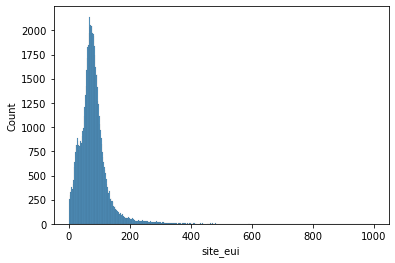

In [3]:
# Create histogram with seaborn
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.histplot(data = wids_train, x = 'site_eui')
plt.show()

## Comparing Categories

Seaborn makes it easy to add categorical comparisons by colour. 

We can compare the distribution for different States by adding the keyword argument `hue`.
Specifying the `State_Factor` as the `hue` will separate each state by colour.


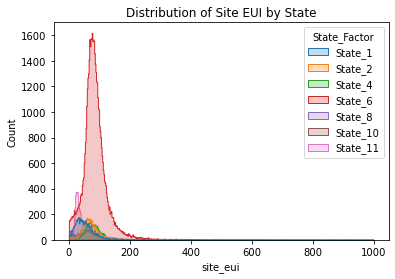

In [4]:
# Differentiate states by hue
fig, ax = plt.subplots()
ax = sns.histplot(data = wids_train, x = 'site_eui', hue='State_Factor', element='step')   # draw as a step function
ax.set_title('Distribution of Site EUI by State')
plt.show()

### Seaborn boxplot

Similarly, we can create a comparative boxplot that compares the distribution of site EUI by state and building class. 



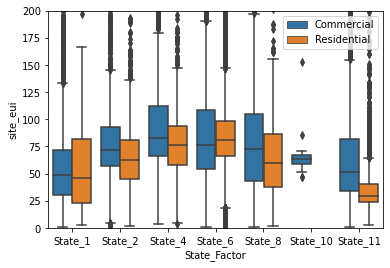

In [5]:
# Create boxplot by State and Building Class
fig, ax = plt.subplots()
ax = sns.boxplot(data = wids_train, 
                 x='State_Factor', 
                 y='site_eui', 
                 hue='building_class')
ax.set_ylim(0,200)
ax.legend(loc='upper right')
plt.show()


### Scatterplot with Seaborn

Recall that we previously created a scatterplot using the `scatter` method in Matplotlib.

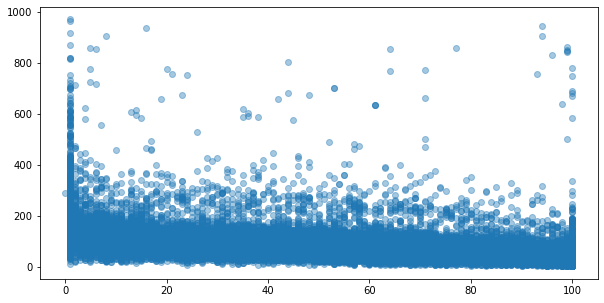

In [6]:
# Scatterplot with matplotlib
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data = wids_train, x='energy_star_rating', y='site_eui', alpha=0.4)
plt.show()

Let's say we wanted to create the same scatter plot but we want to compare the `building_class` category.

All we have to do is to add the `building_class` for the `hue` argument, and this will *colour* the points according to the building class.

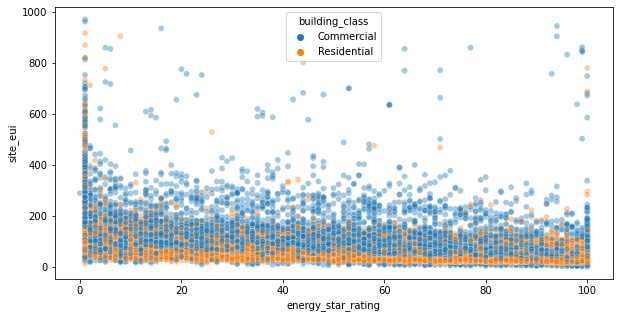

In [7]:
# Create the scatterplot using seaborn, still using figure and ax as before 

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data = wids_train, 
                     x='energy_star_rating', y='site_eui', 
                     hue='building_class', alpha = 0.4)
plt.show()

The points are now coloured based on the `building_class` value, and we can see that more residential buildings seem to have lower `site_eui` values than commercial buildings for the same `energy_star_rating` values.


### Bar Chart 
A bar chart is another type of plot that is usually used to compare categorical data. Seaborn can automatically create a barplot with an estimated summary value by category.

For example, we can create a barplot comparing the mean `site_eui` based on `building_class`.


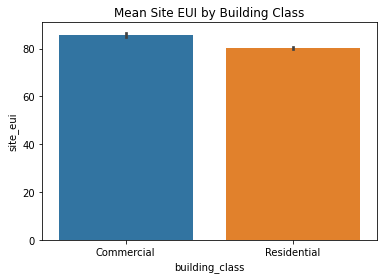

In [8]:
# bar plot of mean site eui
fig, ax = plt.subplots()
ax = sns.barplot(data = wids_train, x = 'building_class', y='site_eui')
ax.set_title("Mean Site EUI by Building Class")
plt.show()

The little black lines shown at the top of each bar is an error bar to show the confidence interval estimate for the mean. We can turn it off by using the argument `ci=None`.

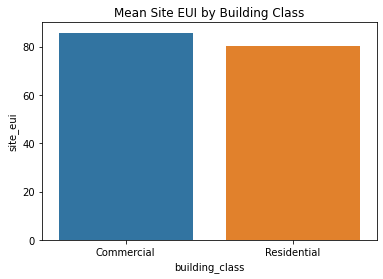

In [9]:
# bar plot of mean site eui
fig, ax = plt.subplots()
ax = sns.barplot(data = wids_train, 
                 x = 'building_class', 
                 y='site_eui', ci=None)
ax.set_title("Mean Site EUI by Building Class")
plt.show()

**Estimator Values**

When we specify the categories that we want to plot, Seaborn will calculate an single value from each group of categories depending on the `estimator=` argument. 

The default estimator is the mean, but we can specify a different estimator such as
- `estimator=len` for the number of observations in the group
- `estimator=np.median` for the median value (using numpy)
- `estimator=sum` for the sum of all the values
- `estimator=max` for the highest value
- `estimator=min` for the highest value

For example, the barplot below shows the median site eui for each building class in each state.

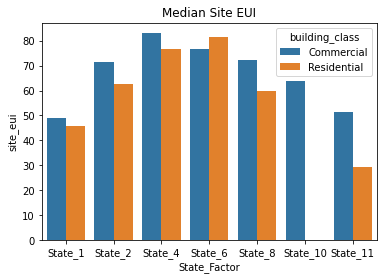

In [10]:
# bar plot of Median site eui
import numpy as np
fig, ax = plt.subplots()
ax = sns.barplot(data = wids_train, 
                 x = 'State_Factor', 
                 y='site_eui', 
                 hue='building_class', 
                 ci=None, 
                 estimator=np.median)
ax.set_title("Median Site EUI")
plt.show()

**Building Type (Site EUI)**

We need to further investigate the facility type for some clarity. First check how many observations there are for each facility type:

In [11]:
# Count the number of observations for each facility type
wids_train['facility_type'].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

It looks like there are many levels, so we will compare the 'Commercial' facility types first. 

Putting the `facility_type` as the `y=` value will make the barplot appear horizontally.

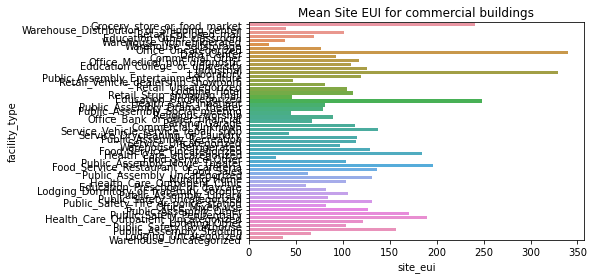

In [12]:
# filter to obtain Commercial Buildings
comm_bldgs = wids_train[wids_train['building_class']=='Commercial']

# Create a barplot by facility type
fig, ax = plt.subplots()
ax = sns.barplot(data =comm_bldgs, y="facility_type",x="site_eui", ci=None)
ax.set_title("Mean Site EUI for commercial buildings")
plt.show()


There are many facility types, so you can adjust the figure size in the `subplots()` method. 

Let's just show the top 10 sites with highest `site_eui`. In order to do this, we can specify the sort order in the plot.

But first we have to sort the values.
Let's find the order in which we should show the bars, by doing the following steps:

In [13]:
# 1. group by facility type and calculate the mean site eui for each group
mean_eui_by_facility = comm_bldgs.groupby('facility_type')['site_eui'].mean()
print(mean_eui_by_facility )

facility_type
Commercial_Other                              92.642037
Commercial_Unknown                           113.151628
Data_Center                                  339.734876
Education_College_or_university              108.629116
Education_Other_classroom                     69.441531
Education_Preschool_or_daycare                60.974215
Education_Uncategorized                       46.172799
Food_Sales                                   136.793222
Food_Service_Other                            29.236616
Food_Service_Restaurant_or_cafeteria         195.593925
Food_Service_Uncategorized                   128.801496
Grocery_store_or_food_market                 241.135162
Health_Care_Inpatient                        248.340597
Health_Care_Outpatient_Clinic                103.613131
Health_Care_Outpatient_Uncategorized         189.892345
Health_Care_Uncategorized                    183.945201
Industrial                                   125.345295
Laboratory                        

In [14]:
# 2. Now sort in descending order
mean_eui_sorted = mean_eui_by_facility.sort_values(ascending=False)
print (mean_eui_sorted)


facility_type
Data_Center                                  339.734876
Laboratory                                   329.448470
Health_Care_Inpatient                        248.340597
Grocery_store_or_food_market                 241.135162
Food_Service_Restaurant_or_cafeteria         195.593925
Health_Care_Outpatient_Uncategorized         189.892345
Health_Care_Uncategorized                    183.945201
Public_Safety_Penitentiary                   170.904892
Public_Assembly_Stadium                      157.041663
Service_Vehicle_service_repair_shop          137.595749
Food_Sales                                   136.793222
Nursing_Home                                 131.313887
Public_Safety_Fire_or_police_station         131.122766
Food_Service_Uncategorized                   128.801496
Public_Assembly_Other                        126.704295
Industrial                                   125.345295
Lodging_Other                                120.958325
Public_Assembly_Entertainment_cult

In [15]:
# 3. then just get the facility type names: index
plot_order = mean_eui_sorted.index

We can put the steps 1 - 3 above in one statement like this:

In [16]:
# 1. group by facility type to calculate the mean site eui
# 2. then sort in descending order
# 3. then just get the facility type names: index
plot_order = comm_bldgs.groupby('facility_type')['site_eui'].mean().sort_values(ascending=False).index


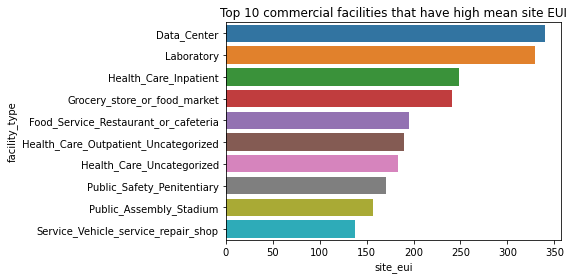

In [17]:
# plot showing only the top 10 using plot_order[:10]
fig, ax = plt.subplots()
ax = sns.barplot(data =comm_bldgs, y="facility_type",x="site_eui", order=plot_order[:10], ci=None)
ax.set_title("Top 10 commercial facilities that have high mean site EUI")

plt.show()

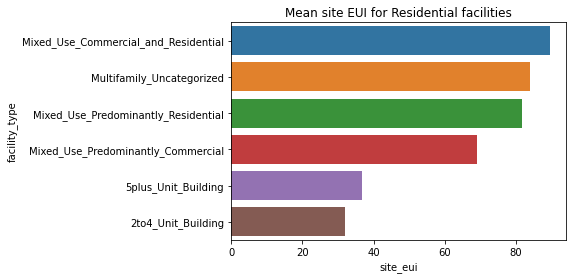

In [18]:
# Similarly, plot the Residential buildings
res_bldgs = wids_train[wids_train['building_class']=='Residential']
plot_order = res_bldgs.groupby('facility_type')['site_eui'].mean().sort_values(ascending=False).index

# only 6 types, so not necessary to find top 10

fig, ax = plt.subplots()
ax = sns.barplot(data =res_bldgs, y="facility_type",x="site_eui", order=plot_order, ci=None)
ax.set_title("Mean site EUI for Residential facilities")
plt.show()

Based on the two horizontal bar plots, we can see that:

* The mean site EUI for Commercial buildings is highest for data centres.
* For Residential buildings, mixed use type facilities have highest mean site EUI.


### Heatmaps with Seaborn

When a category has many levels, like the `facility_type` above, a heatmap is useful for comparing the values by colour. 

A heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colours in the graph. 
The goal of the heatmap is to provide a coloured visual summary of information. 

For example, we can calculate the median site EUI for each building class by state. First we create a two-way table for the two dimensions, `building_class` and `State_Factor`.

In [19]:
# Calculate median for each group of building class and state
eui_By_building_class = wids_train.groupby(['building_class','State_Factor'])['site_eui'].median()
data = eui_By_building_class.unstack()
data

State_Factor,State_1,State_10,State_11,State_2,State_4,State_6,State_8
building_class,,,,,,,
Commercial,48.855937,63.846785,51.342855,71.378635,83.160801,76.775227,72.472720
Residential,45.696960,NaN,29.485256,62.462622,76.726475,81.320727,59.904358


Now that the rows represent the building class and the columns represent the states, we can plot the heatmap:

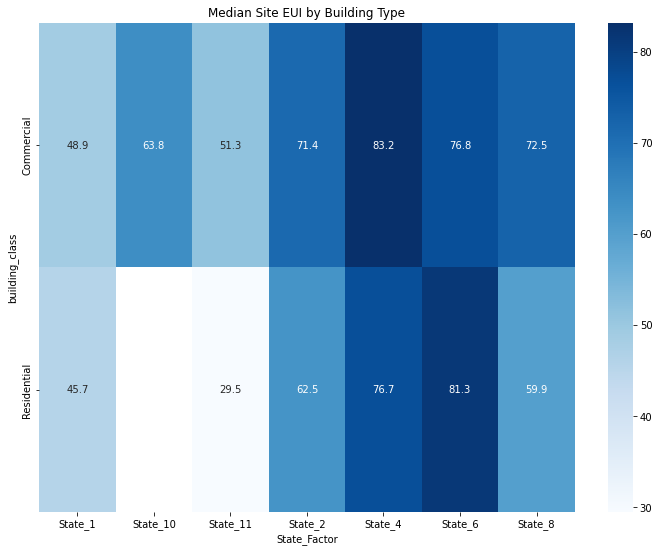

In [20]:
# Create heatmap
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.heatmap(data, annot=True, fmt="0.01f", cmap="Blues")
ax.set_title('Median Site EUI by Building Type')
plt.show()

Let's try the heatmap with the facility types.

In [21]:
# get the data required as a two-way table
eui_by_Facility = wids_train.groupby(['facility_type','State_Factor'])['site_eui'].median()
data = eui_by_Facility.unstack()
data


State_Factor,State_1,State_10,State_11,State_2,State_4,State_6,State_8
facility_type,,,,,,,
2to4_Unit_Building,NaN,NaN,27.721010,NaN,NaN,NaN,NaN
5plus_Unit_Building,NaN,NaN,32.088350,89.498880,NaN,NaN,NaN
Commercial_Other,48.505285,153.093639,79.984068,106.907624,80.265324,64.881795,42.788231
Commercial_Unknown,36.300546,NaN,NaN,88.429845,NaN,NaN,NaN
Data_Center,612.480411,NaN,NaN,NaN,NaN,300.224529,236.040903
Education_College_or_university,52.182466,NaN,63.413370,92.275852,90.617896,97.410631,98.635237
Education_Other_classroom,32.230000,NaN,38.194175,72.719377,72.039682,62.628415,71.941820
Education_Preschool_or_daycare,36.001366,NaN,NaN,91.907969,70.127046,54.650273,NaN
Education_Uncategorized,32.624203,NaN,NaN,NaN,37.522881,86.435648,73.175095


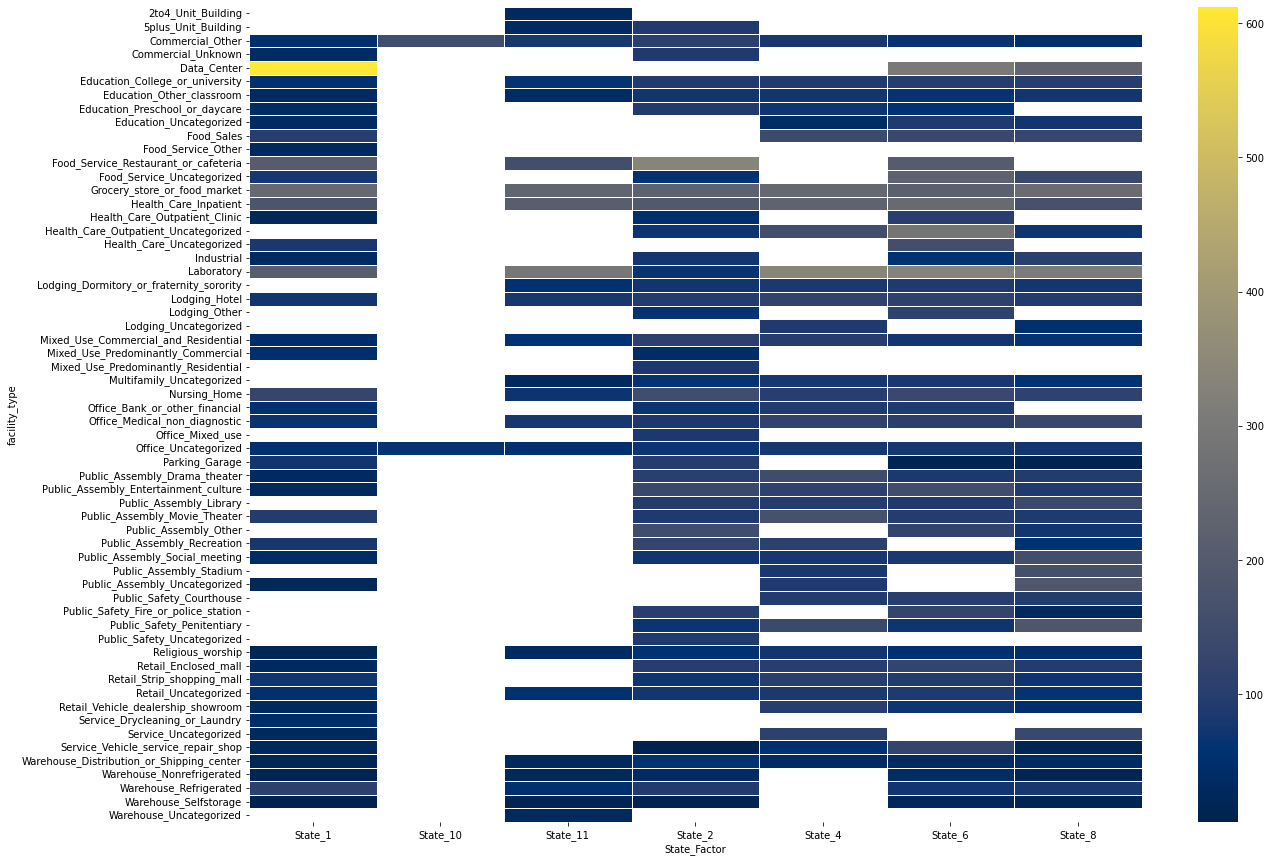

In [22]:
# Create heatmap using 
# two way table data
fig, ax = plt.subplots(figsize=(20,15))
ax=sns.heatmap(data, 
               linewidths=0.5, 
               cmap='cividis')
plt.show()

In this heatmap, although we have not annotated the values, the use of colours help identify the facility types and states with the highest median site eui values.

### Line Charts

Another common chart is a line chart, which is often used to visualise trends. The x-axis is usually a time sequence.

Seaborn can generate the line chart and estimate the mean value of the required variable at each point of the x-axis value. 

**Year Built**

We can plot the site eui data according to the year the building was built. To simplify this exercise we will choose only buildings built after 1950.



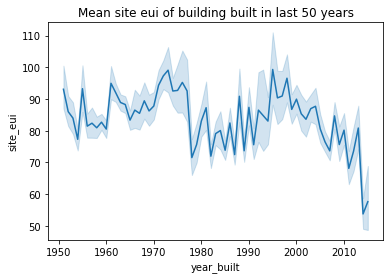

In [23]:
# Plot line chart using Seaborn lineplot()
fig, ax = plt.subplots()
ax = sns.lineplot(data=wids_train[wids_train['year_built']>1950], x='year_built', y='site_eui')
ax.set_title('Mean site eui of building built in last 50 years')
plt.show()

Newer buildings tend to have lower mean site EUI when compared to old buildings

Seaborn will calculate the mean by default and plot the values with confidence interval estimates when plotting the line, as shown in the "shadow" above and below the line. To remove the confidence intervals, set `ci=None`

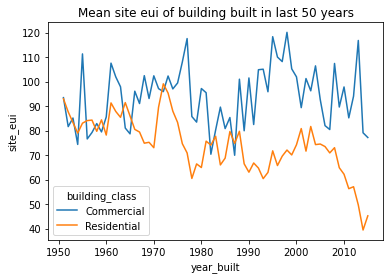

In [24]:
# plot without confidence interval and separate by building class
fig, ax = plt.subplots()
ax = sns.lineplot(data=wids_train[wids_train['year_built']>1950], x='year_built', y='site_eui', hue = 'building_class', ci=None)
ax.set_title('Mean site eui of building built in last 50 years')
plt.show()

We have again added the hue to show the building class. It is clear that the residential buildings start to have lower site EUI than commercial buildings after the 1970s.

### Other Category Plots

There are many other plots provided by Seaborn for plotting categorical data. You can check out them out here: [Seaborn Category Plots](https://seaborn.pydata.org/tutorial/categorical.html).

Here is an example of a Violinplot, that can be used to show both the distribution of `site_eui` by considering the `State_Factor` **and** `building_class` categories:
- the width on either side of each 'violin' shows number of observations like a histogram
- the height of the violin show the range of values
- the mini box within the violin indicate the quartiles, like a boxplot.

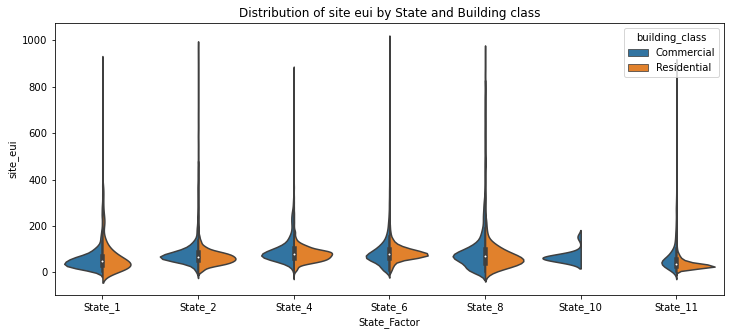

In [25]:
# violin plot 

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.violinplot(data = wids_train, 
                 x = 'State_Factor', 
                 y='site_eui', 
                 hue='building_class', split=True)
ax.set_title("Distribution of site eui by State and Building class")
plt.show()

## Exercises

Let's try some of the category plots as exercises.

Suppose we want to investigate further on the differences in bike rental for the Capital Bike Share Data.

Read in the data again:

In [26]:
date_cols = ['rental_date','started_at', 'ended_at']
bikes = pd.read_csv('bikes_clean.csv', parse_dates = date_cols, dayfirst=True)
bikes.head()

,ride_id,rideable_type,rental_date,rental_hour,started_at,ended_at,start_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_in_min,day_of_week
0,5A2157D0EC77FF72,classic,2022-01-01,0,2022-01-01 00:04:00,2022-01-01 00:10:00,31241.0,38.905900,-77.032500,38.902760,-77.038630,casual,0 days 00:06:00,6,Saturday
1,19DBFDE1D077F113,electric,2022-01-01,0,2022-01-01 00:05:00,2022-01-01 00:15:00,31202.0,38.913055,-77.031823,38.930000,-77.050000,casual,0 days 00:10:00,10,Saturday
2,1B6B8A705833DCE2,docked,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:47:00,31200.0,38.910100,-77.044400,38.900283,-77.029822,casual,0 days 00:41:00,41,Saturday
3,ED112F28D5F492B8,classic,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:20:00,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday
4,6F2C888044490871,classic,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:20:00,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday


Q1. Create a lineplot to show the mean duration of rentals, in minutes by the rental date. 

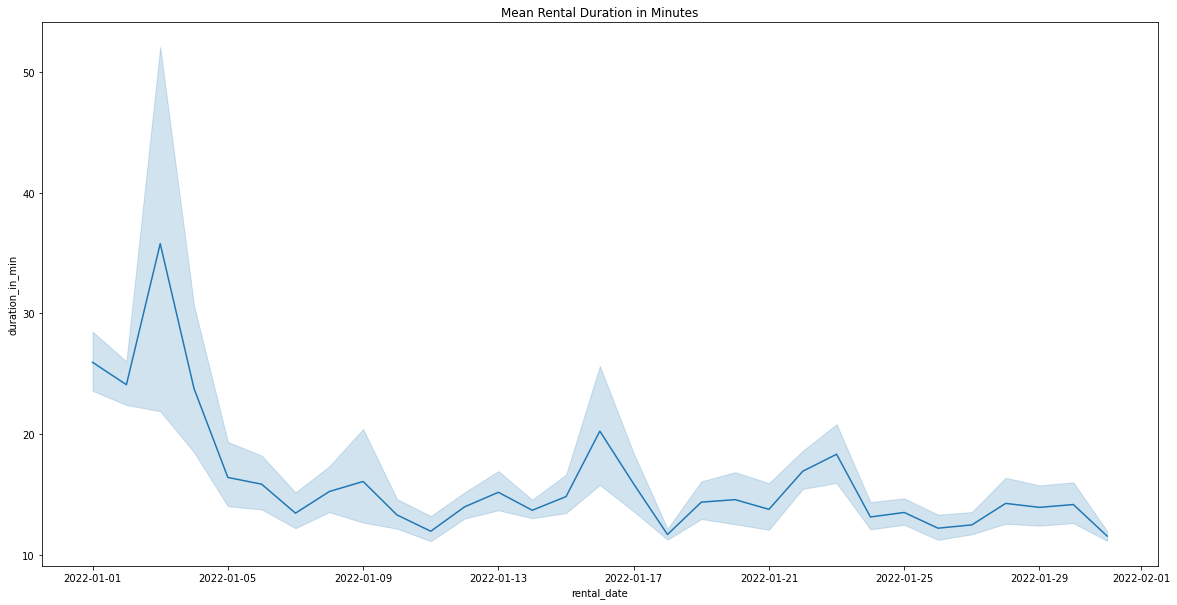

In [27]:
# Q1 Answer
# plot duration of rental by date
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=bikes, x='rental_date', y='duration_in_min')
ax.set_title('Mean Rental Duration in Minutes')
plt.show()

Q2. Let's see if there is any difference in the duration in rental based on the day of the week. 

Create a box plot  to compare the `duration_in_min` for each `day_of_week`. You might have to set the y limits to a smaller range to view the differences clearly.

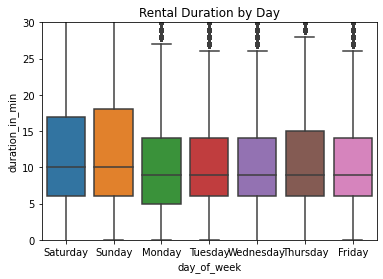

In [28]:
# Q2 Answer

#plot duration in minutes by day of week
fig, ax = plt.subplots()
ax = sns.boxplot(data=bikes, x='day_of_week', y='duration_in_min')
ax.set_title('Rental Duration by Day')
ax.set_ylim(0,30)
plt.show()

Q3. Add the `hue` argument to the boxplot above to compare the duration of rental for members vs casual users.

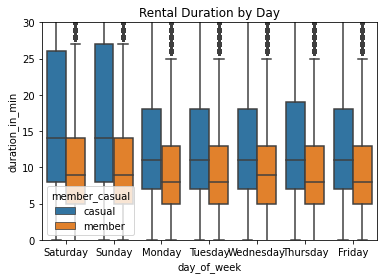

In [29]:
# Q3 Answer

# add the hue='member_casual' to the boxplot above to add another dimension for comparison
fig, ax = plt.subplots()
ax = sns.boxplot(data=bikes, x='day_of_week', y='duration_in_min', hue='member_casual')
ax.set_title('Rental Duration by Day')
ax.set_ylim(0,30)
plt.show()

Q4. Create a barplot to compare the rideable type, type of member and mean duration of rental

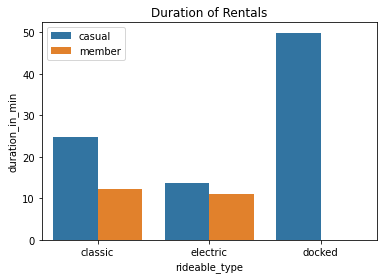

In [30]:
# Q4 Answer
# plot duration of rental by each type
fig, ax = plt.subplots()
ax = sns.barplot(data=bikes, x='rideable_type', y='duration_in_min', hue = 'member_casual', ci=None)
ax.set_title('Duration of Rentals')

plt.legend()
plt.show()

Q5. Create a volinplot to compare the duration of rental for each day of week, split by members vs casual users 

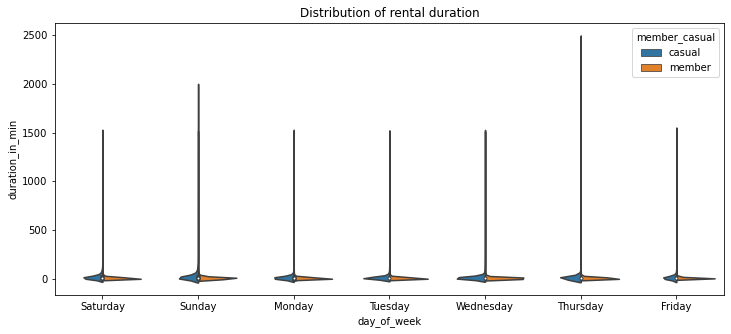

In [31]:
# Q5 Anwer
# violin plot 
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.violinplot(data = bikes, 
                 x = 'day_of_week', 
                 y='duration_in_min', 
                 hue='member_casual', split=True)
ax.set_title("Distribution of rental duration")
plt.show()

Q6a. Let's try a heatmap. Create a two-way table that calculates the number of rentals by `day_of_week` and `rental_hour` from the `bikess` data set.

In [32]:
# Q6a. Answer

#use groupby to count the number of rentals  by day of week, then rental hour.
grouping = bikes.groupby(['day_of_week', 'rental_hour'])['ride_id'].count()
data = grouping.unstack()
data

rental_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,146,82,39,33,42,120,385,703,955,710,...,991,1130,1150,1305,1041,829,450,347,377,285
Monday,95,43,34,22,41,131,359,727,1068,794,...,970,1162,1352,1669,1382,958,611,485,337,162
Saturday,387,340,289,132,70,79,139,184,372,615,...,1541,1780,1667,1289,1018,843,540,377,356,392
Sunday,304,204,141,78,53,59,100,199,444,762,...,1465,1461,1150,984,830,537,404,380,311,151
Thursday,82,47,35,17,48,104,356,643,1062,768,...,1029,1228,1410,1770,1634,1081,688,594,430,276
Tuesday,70,40,14,11,38,136,358,729,1100,681,...,823,939,1146,1486,1280,863,539,410,313,149
Wednesday,69,48,16,20,30,146,376,765,1172,748,...,922,1223,1248,1717,1602,1099,747,625,413,196


Q6b. Now create the heatmap. Check the colormaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and select a suitable colormap to match the heatmap. Which days and hours have the highest number of rentals?

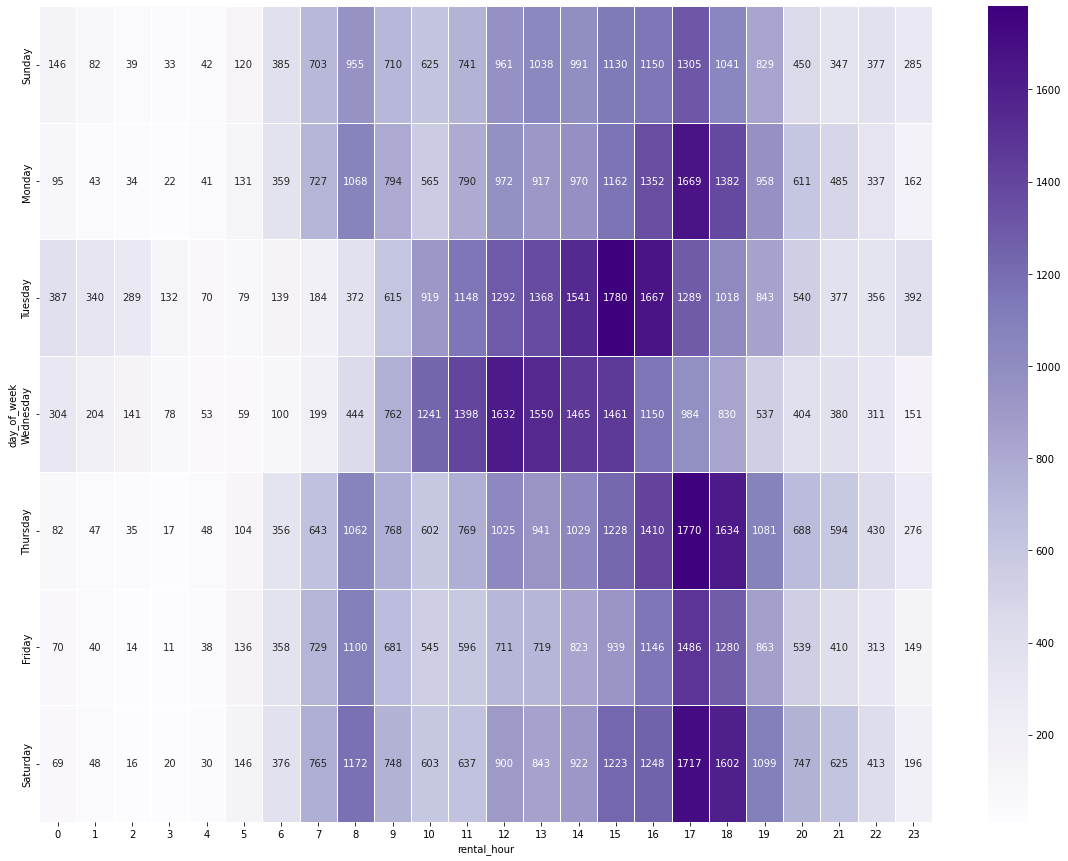

In [33]:
# Q6b answer
# Create heatmap using 
# two way table data from Q6a.
fig, ax = plt.subplots(figsize=(20,15))
ax=sns.heatmap(data, annot=True,
               linewidths=0.5, fmt='d',
               cmap='Purples', yticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

Great! We can see that Seaborn helps us to visualise our data and compare across categories, especially with the use of colour. Next we will try to organise our figures with subplots.